In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("../data/processed/dev_sample.csv")

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,49464.0,1.066096,0.117357,-0.219046,1.364723,0.047608,-0.246092,0.147098,-0.068591,0.470636,...,-0.319663,-0.930455,-0.177932,-0.571610,0.601876,-0.483367,0.035014,0.061513,100.06,0
1,57207.0,1.300164,0.102946,-1.403677,0.185656,2.360613,3.398775,-0.269983,0.765126,-0.075124,...,-0.090099,-0.244171,-0.180229,1.018904,0.999122,-0.245222,0.011885,0.006544,1.00,0
2,125363.0,1.955785,-0.404286,-1.432686,0.107783,0.741735,1.082268,-0.294245,0.246207,0.879724,...,0.110649,0.698194,0.141015,-0.474033,-0.075610,0.829762,-0.024302,-0.075894,6.00,0
3,41694.0,1.264396,-0.067996,-0.589833,-0.426132,0.255630,-0.426491,0.299311,-0.126415,-0.172398,...,-0.385412,-1.302839,-0.043288,-0.822449,0.297202,0.788024,-0.126869,-0.016057,53.90,0
4,151645.0,-0.352354,1.106251,-0.722799,-0.336481,0.334116,-1.336329,1.089566,0.015707,-0.507217,...,0.381413,0.975271,-0.063710,0.003139,0.097993,-0.184039,-0.072176,0.003442,85.25,0


In [2]:

# Separate features/target
X = df.drop(columns=["Class"])
y = df["Class"].values

# Keep indices for later merges
X_idx = np.arange(len(X))

In [4]:

# Train AE ONLY on non-fraud (Class==0) to learn "normal"
X_normal = X[y==0].copy()

# Train/valid split on normal data (hold out a small slice to tune AE)
Xn_train, Xn_valid = train_test_split(X_normal, test_size=0.2, random_state=42, shuffle=True)

# Fit scaler on TRAIN NORMAL ONLY (to avoid leakage)
scaler = StandardScaler().fit(Xn_train)

In [5]:
Xn_train_s = scaler.transform(Xn_train)
Xn_valid_s = scaler.transform(Xn_valid)
X_all_s    = scaler.transform(X)  # for later scoring every row

X_cols = X.columns.tolist()
input_dim = Xn_train_s.shape[1]
input_dim

30

c:\Users\prash\anaconda3\envs\rag_env\lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\prash\anaconda3\envs\rag_env\lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\prash\anaconda3\envs\rag_env\lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please update the gencode

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.9916 - val_loss: 0.9453 - learning_rate: 0.0010
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9591 - val_loss: 0.9008 - learning_rate: 0.0010
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9132 - val_loss: 0.8478 - learning_rate: 0.0010
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8614 - val_loss: 0.7960 - learning_rate: 0.0010
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8111 - val_loss: 0.7509 - learning_rate: 0.0010
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7682 - val_loss: 0.7171 - learning_rate: 0.0010
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7387 - val_loss: 0.6939 - learning_rate: 0.0010
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7127 - val_loss: 0.6745 - learning_rate: 0.0010
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6899 - val_loss: 0.6536 - learning_rate: 0.0010
Epoch 10/50
16/16 ━━━━━━━━━

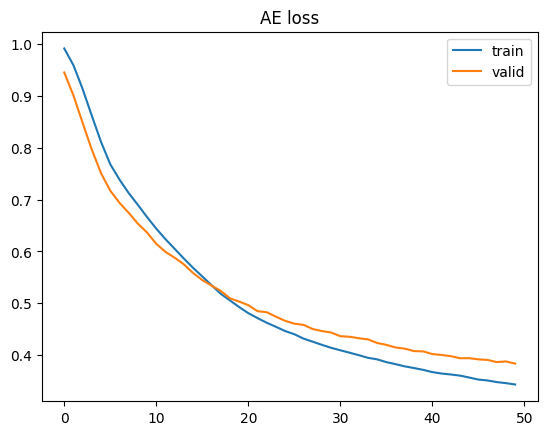

Saved: C:\Users\prash\OneDrive\Documents\ML Ops Course\Fraud Risk Detection\data\processed\dev_with_recon.csv


In [8]:
import sys
import os
sys.path.append(os.path.abspath(".."))

from src.models.autoencoder_tf import train_autoencoder, reconstruction_error

model, hist = train_autoencoder(
    Xn_train_s, Xn_valid_s, input_dim=input_dim, bottleneck=8, epochs=50, batch_size=256
)

import matplotlib.pyplot as plt
plt.plot(hist["loss"], label="train")
plt.plot(hist["val_loss"], label="valid")
plt.legend(); plt.title("AE loss"); plt.show()

# Reconstruction error for every row (including frauds)
recon_err_all = reconstruction_error(model, X_all_s)

# Attach as new feature
X_with_err = X.copy()
X_with_err["recon_error"] = recon_err_all

# Save for next step (GBM)
Path("../data/processed").mkdir(parents=True, exist_ok=True)
out_path = Path("../data/processed/dev_with_recon.csv")
X_with_err.assign(Class=y).to_csv(out_path, index=False)
print("Saved:", out_path.resolve())


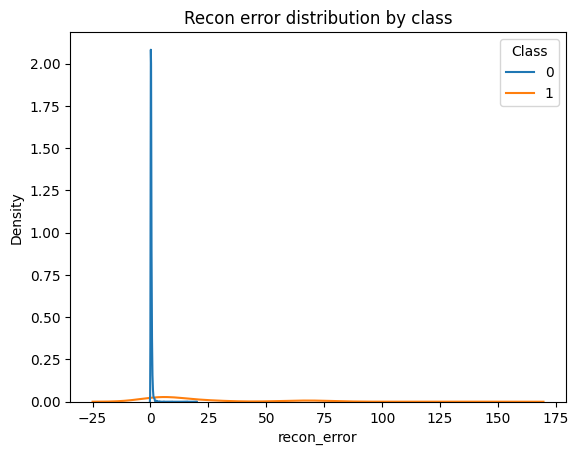

        count       mean        std       min       25%        50%        75%  \
Class                                                                           
0      5000.0   0.348580   0.503703  0.025376  0.152010   0.253338   0.415787   
1       492.0  22.970446  28.878280  0.094550  4.322503  10.093763  27.763527   

              max  
Class              
0       19.722702  
1      144.532812  


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

tmp = pd.DataFrame({"recon_error": recon_err_all, "Class": y})
sns.kdeplot(data=tmp, x="recon_error", hue="Class", common_norm=False)
plt.title("Recon error distribution by class"); plt.show()

print(tmp.groupby("Class")["recon_error"].describe())
